In [12]:
import numpy as np

npy_path = "C:\\Users\\jiayang\\ipynb\\APS_Thesis\\data\\imagenet_count_normalize.npy"
npy_file = np.load(npy_path)

print("Matrix shape:", npy_file.shape)  # 确保它是 (50000, 1000)

row_index = 99
print(f"Row {row_index} content:", npy_file[row_index])

Matrix shape: (50000, 1000)
Row 99 content: [0.         0.99899709 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

In [8]:
zero_prob_rows = np.sum(np.all(npy_file == 0, axis=1))
one_prob_rows = np.sum(np.all(npy_file == 1.0, axis=1))
row_sums = np.sum(npy_file, axis=1)
sum_greater_than_1_rows = np.sum((row_sums > 1.0) & (row_sums <= 2))
sum_greater_than_0_rows = np.sum((row_sums > 0) & (row_sums <= 1))

print(f"所有概率均为 0 的行数: {zero_prob_rows}")
print(f"所有概率相加大于 0 的行数: {sum_greater_than_0_rows}")
print(f"所有概率相加大于 1 的行数: {sum_greater_than_1_rows}")
print(f"所有概率相加= 1 的行数: {one_prob_rows}")

所有概率均为 0 的行数: 25111
所有概率相加大于 0 的行数: 21744
所有概率相加大于 1 的行数: 3145
所有概率相加= 1 的行数: 0


In [11]:
row_sums = npy_file.sum(axis=1)

# 找出大于1的行（考虑浮点误差，默认阈值 1e-6）
eps = 1e-100
exceeds_mask = row_sums > (1 + eps)

# 超过1的行数
num_exceeds = np.sum(exceeds_mask)
print(f"共有 {num_exceeds} 行的和超过了 1 + {eps}")

# 计算超出的量（只保留超过的部分）
exceeds_amount = row_sums[exceeds_mask] - 1

if num_exceeds > 0:
    print(f"最大超出值: {np.max(exceeds_amount):.10f}")
    print(f"最小超出值: {np.min(exceeds_amount):.10f}")
    print(f"平均超出值: {np.mean(exceeds_amount):.10f}")
    print("\n前几个超出示例（行和 - 1）：")
    print(exceeds_amount[:10])
else:
    print("所有行都在允许范围内。")

共有 3145 行的和超过了 1 + 1e-100
最大超出值: 0.0000000000
最小超出值: 0.0000000000
平均超出值: 0.0000000000

前几个超出示例（行和 - 1）：
[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16]


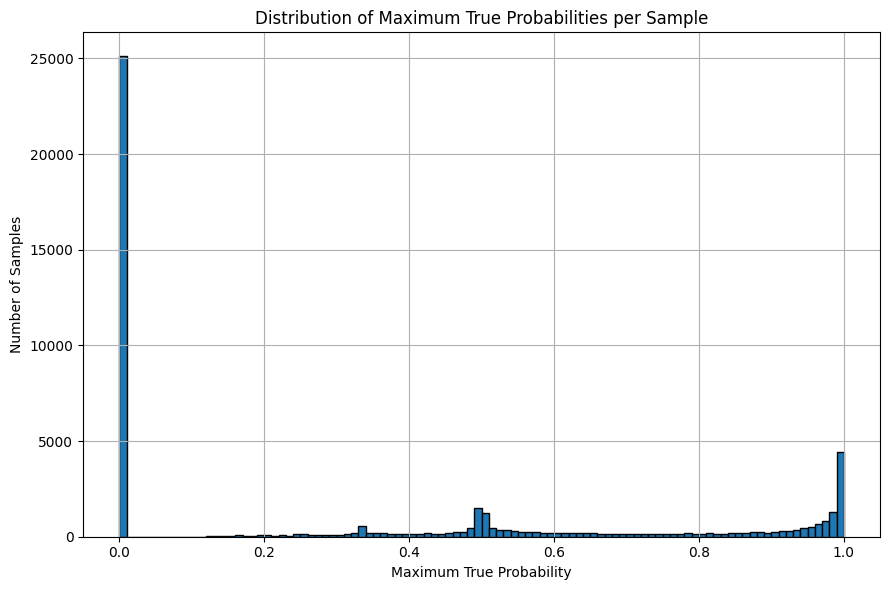

In [13]:
import matplotlib.pyplot as plt

max_probs = np.max(npy_file, axis=1)

# 绘制直方图
plt.figure(figsize=(9, 6))
plt.hist(max_probs, bins=100, edgecolor='black')
plt.title("Distribution of Maximum True Probabilities per Sample")
plt.xlabel("Maximum True Probability")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()